In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# reading the data
train_data = pd.read_csv('/content/drive/MyDrive/Emp_attrition_Train.csv')


In [13]:
#dataset overview
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Ename                                           1028 non-null   object 
 1   Age                                             1028 non-null   int64  
 2   NumCompaniesWorked                              1028 non-null   int64  
 3   Previous company experience                     1028 non-null   object 
 4   Job role in previous company                    1028 non-null   object 
 5   Number of years experience in prevoius company  1028 non-null   int64  
 6   Reason for leaving                              1028 non-null   object 
 7   Salary in previous company                      1028 non-null   float64
 8   Present expectation Y/N                         1028 non-null   object 
 9   Expectation of hike in %                 

In [67]:
train_data.drop(['Ename','EmployeeNumber'],axis=1,inplace=True)


In [14]:
#statistical view of dataset
train_data.describe()


,Age,NumCompaniesWorked,Number of years experience in prevoius company,Salary in previous company,Expectation of hike in %,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,2.218872,2.697471,3316.286965,0.148784,2.873541,710.198444,2.719844,2.731518,2.093385,2.757782,6632.573930,3.152724,0.758755,11.417315,7.250973,4.141051
std,9.444297,1.251972,2.527534,2427.873920,0.166618,1.032840,418.513656,1.089614,0.703240,1.141854,1.105306,4855.747841,0.359896,0.836236,8.015441,6.203562,3.608460
min,18.000000,0.000000,0.000000,504.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,3.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,1.000000,1.000000,1443.000000,0.000000,2.000000,351.750000,2.000000,2.000000,1.000000,2.000000,2886.000000,3.000000,0.000000,6.000000,3.000000,2.000000
50%,36.000000,2.000000,2.000000,2453.750000,0.150000,3.000000,701.500000,3.000000,3.000000,2.000000,3.000000,4907.500000,3.000000,1.000000,10.000000,5.000000,3.000000
75%,43.000000,3.000000,4.000000,4364.750000,0.350000,4.000000,1069.250000,4.000000,3.000000,3.000000,4.000000,8729.500000,3.000000,1.000000,16.000000,9.000000,7.000000
max,60.000000,4.000000,9.000000,9999.500000,0.500000,5.000000,1447.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,4.000000,3.000000,40.000000,40.000000,17.000000


EXPLORATORY DATA ANALYSIS

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = train_data.select_dtypes(include=numerics)
numeric_df.columns

Index(['Age', 'NumCompaniesWorked',
       'Number of years experience in prevoius company',
       'Salary in previous company', 'Expectation of hike in %', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
train_data.select_dtypes(include='object').columns.unique()

Index(['Ename', 'Previous company experience', 'Job role in previous company',
       'Reason for leaving', 'Present expectation Y/N', 'Promotion Y/N',
       'New designation after promotion', 'Attrition', 'BusinessTravel',
       'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [17]:
category_df = train_data.select_dtypes(include='object')
category_df

,Ename,Previous company experience,Job role in previous company,Reason for leaving,Present expectation Y/N,Promotion Y/N,New designation after promotion,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime
0,Kim Mann,Yes,Junior Sales Executive,Lack of flexible work options,Yes,Yes,Sales Executive,Yes,Travel_Rarely,Sales,Female,Sales Executive,Single,Yes
1,Jason Garcia,Yes,Research Scientist,for a higher pay,Yes,Yes,Research Scientist,No,Travel_Frequently,Research & Development,Male,Research Scientist,Married,No
2,Leonard Myers,Yes,Laboratory Technician,Lack of flexible work options,Yes,Yes,Laboratory Technician,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Yes
3,Madeline Robinson,Yes,Research Scientist,Lack of flexible work options,Yes,Yes,Research Scientist,No,Travel_Frequently,Research & Development,Female,Research Scientist,Married,Yes
4,Christopher Simpson,Yes,Laboratory Technician,Lack of flexible work options,Yes,Yes,Laboratory Technician,No,Travel_Rarely,Research & Development,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Lisa Davis,Yes,Research Scientist,Lack of flexible work options,Yes,Yes,Research Scientist,No,Travel_Rarely,Research & Development,Female,Research Scientist,Married,No
1024,Christine Tucker,Yes,Research Director,Lack of opportunities for carrier growth and d...,Yes,Yes,Research Director,No,Travel_Rarely,Research & Development,Female,Research Director,Married,No
1025,Darlene Juarez,No,Junior Sales Executive,No previous experience,Yes,Yes,Sales Executive,No,Travel_Rarely,Sales,Female,Sales Executive,Married,Yes
1026,Justin Harrison,Yes,Junior Sales Executive,Lack of flexible work options,Yes,Yes,Sales Executive,No,Travel_Rarely,Sales,Male,Sales Executive,Married,No


In [18]:
#finding the correlation between the columns
corr=numeric_df.corr()

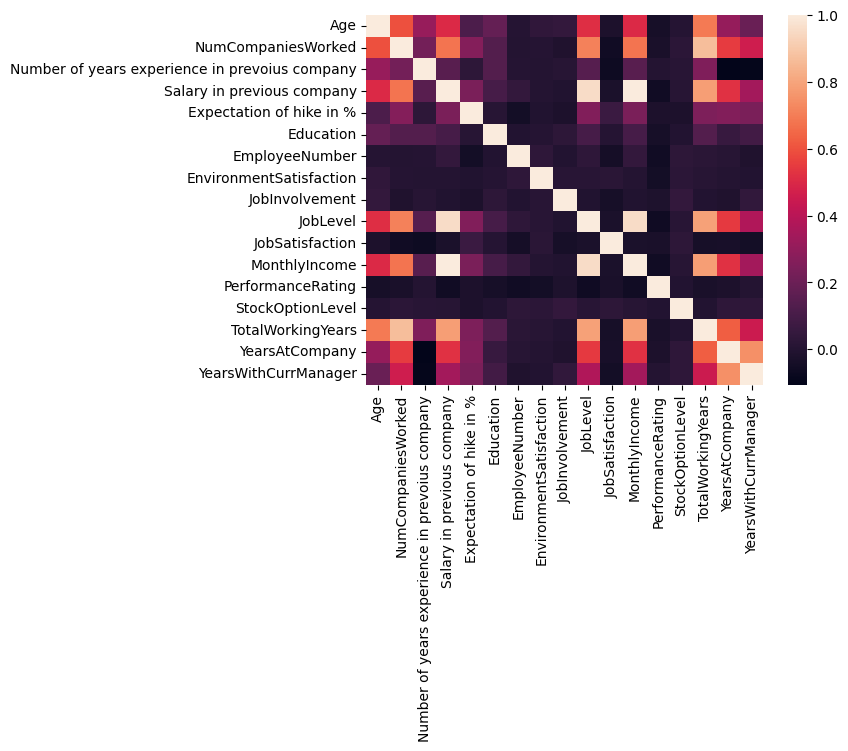

In [19]:
sns.heatmap(corr)
plt.show()

There are high correlation between the columns

## Data analysis

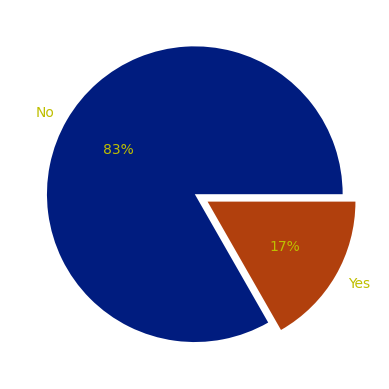

In [29]:
#distribution of targets

# declaring data
data = train_data['Attrition'].value_counts()
ratios = train_data['Attrition'].value_counts().tolist()
keys = ['No','Yes']

# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')

# plotting data on chart
plt.pie(ratios, labels=keys, colors=palette_color,
        explode=explode, autopct='%.0f%%',textprops={'color':"y"})

# displaying chart
plt.savefig('/content/drive/MyDrive/Results/Targets')

plt.show()

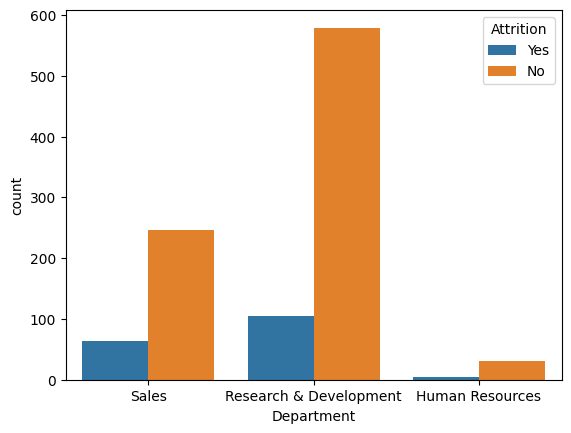

In [28]:
#attrition departmentwise
sns.countplot(data=train_data, x="Department", hue="Attrition")
plt.savefig('/content/drive/MyDrive/Results/Department')

plt.show()


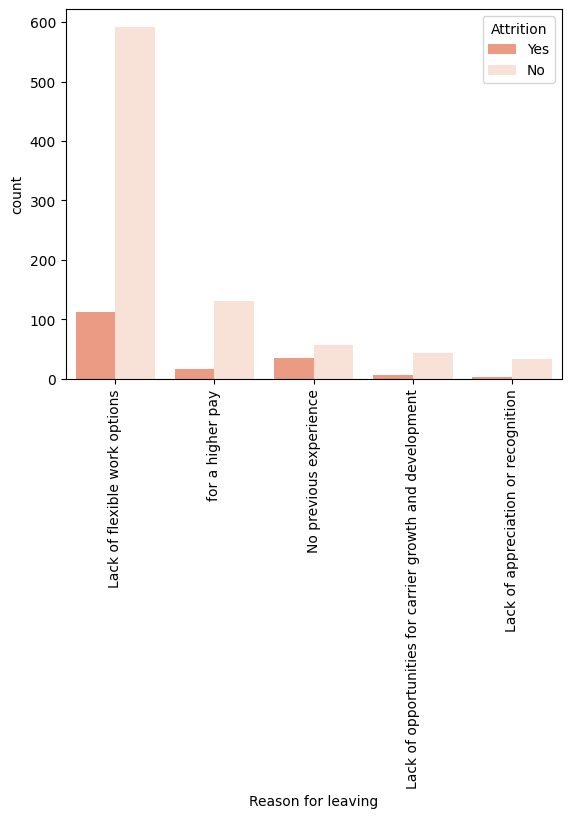

In [30]:
sns.dark_palette("#79C")
sns.countplot(data=train_data, x="Reason for leaving", hue="Attrition",palette=["#fc9272","#fee0d2"])
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Results/Reasonforleaving')

plt.show()

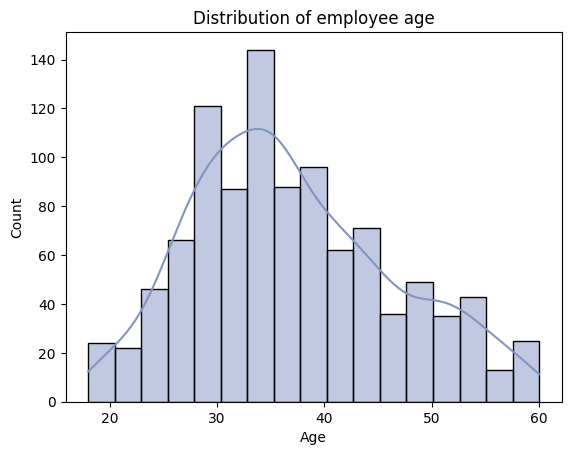

In [31]:
#distribution of age
sns.dark_palette("seagreen")
sns.histplot(x=train_data['Age'],color='#8294C4',kde=True)
plt.title('Distribution of employee age')
plt.savefig('/content/drive/MyDrive/Results/Age')


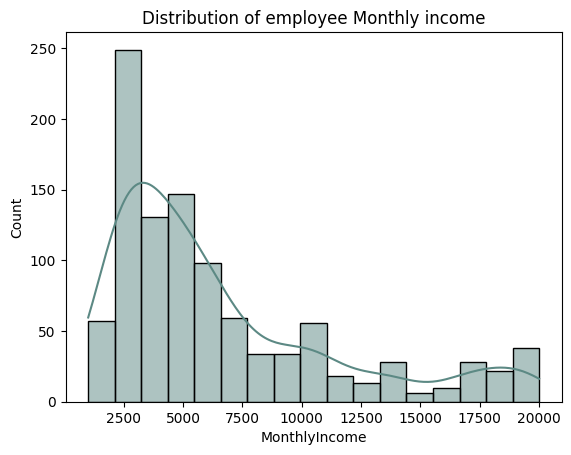

In [32]:
#distribution of age
sns.dark_palette("seagreen")
sns.histplot(x=train_data['MonthlyIncome'],color='#5C8984',kde=True)
plt.title('Distribution of employee Monthly income')
plt.savefig('/content/drive/MyDrive/Results/MonthlyIncome')
plt.show()

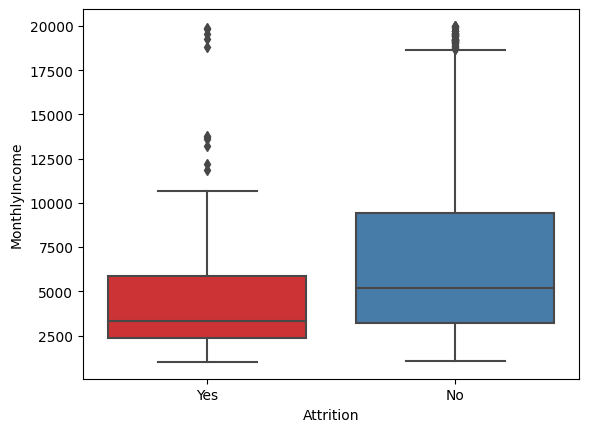

In [34]:
sns.boxplot(x=train_data['Attrition'],y=train_data['MonthlyIncome'],palette="Set1")
plt.savefig('/content/drive/MyDrive/Results/Attrition')
plt.show()


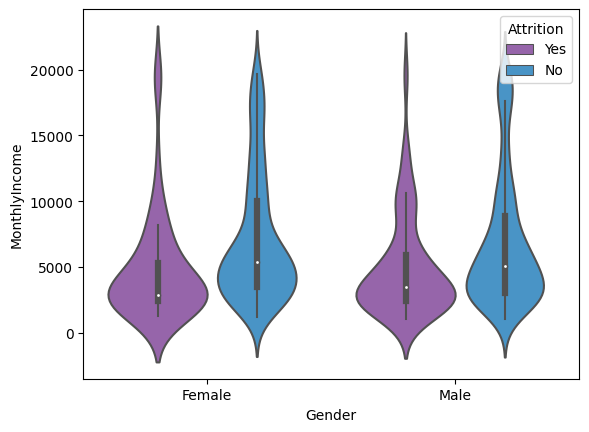

In [35]:
my_colors = ["#9b59b6", "#3498db",
             "#2ecc71", "#006a4e"]
sns.set_palette( my_colors )
sns.violinplot(x=train_data['Gender'],y=train_data['MonthlyIncome'],hue=train_data['Attrition'])
plt.savefig('/content/drive/MyDrive/Results/Gender')
plt.show()


# `Feature selection`

Removing constant features

In [36]:
len(train_data.columns)

31

In [37]:
#categorical encoding
train_data=train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,Ename,Age,NumCompaniesWorked,Previous company experience,Job role in previous company,Number of years experience in prevoius company,Reason for leaving,Salary in previous company,Present expectation Y/N,Expectation of hike in %,...,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager
0,582,23,1,1,2,8,1,573,1,3,...,7,3,2,573,1,0,0,8,5,5
1,422,31,2,1,7,1,4,494,1,3,...,6,1,1,494,0,1,1,10,9,7
2,631,19,1,1,3,6,1,45,1,3,...,2,2,2,45,1,0,0,7,4,0
3,651,15,1,1,7,1,1,231,1,3,...,6,2,1,231,1,0,0,8,7,0
4,197,9,1,1,3,9,1,292,1,3,...,2,1,1,292,0,0,1,6,1,2


In [38]:
#seperating the features and targets
X_train = train_data.drop(['Attrition'],axis=1)
y_train = train_data['Attrition']

In [39]:
# using sklearn variancethreshold to find constant features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [40]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

30

In [41]:
# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

0


[]

There are no constant features...

## Removing quasi constant features

In [42]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [43]:
# get_support is a boolean vector that indicates which features
# are retained. If we sum over get_support, we get the number
# of features that are not quasi-constant
sum(sel.get_support())

30

In [44]:
## finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

0


[]

There are no quasi constant features

## Univariate feature selection

Select K Best

In [45]:
k = 10
feature_names = train_data.columns
# Create a SelectKBest instance with chi-square score function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your data
selector.fit(X_train, y_train)



SelectKBest()

In [46]:


# Get the scores and corresponding feature indices
scores = selector.scores_
feature_indices = np.arange(len(scores))

# Sort the scores and feature indices in descending order
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_features = feature_indices[sorted_indices]

# Get the top k feature names
top_feature_names = [feature_names[i] for i in sorted_features[:k]]
top_feature_names


['MonthlyIncome',
 'MaritalStatus',
 'Salary in previous company',
 'StockOptionLevel',
 'JobSatisfaction',
 'Previous company experience',
 'NumCompaniesWorked',
 'JobInvolvement',
 'Age',
 'PerformanceRating']

In [47]:
features_df_new = train_data[top_feature_names]
features_df_new

,MonthlyIncome,MaritalStatus,Salary in previous company,StockOptionLevel,JobSatisfaction,Previous company experience,NumCompaniesWorked,JobInvolvement,Age,PerformanceRating
0,573,2,573,0,3,1,1,2,23,0
1,494,1,494,1,1,1,2,1,31,1
2,45,2,45,0,2,1,1,1,19,0
3,231,1,231,0,2,1,1,2,15,0
4,292,1,292,1,1,1,1,2,9,0
...,...,...,...,...,...,...,...,...,...,...
1023,36,1,36,1,0,1,1,2,38,1
1024,897,1,897,2,2,1,4,2,29,0
1025,359,1,359,2,2,0,1,2,6,0
1026,728,1,728,1,3,1,1,2,14,0


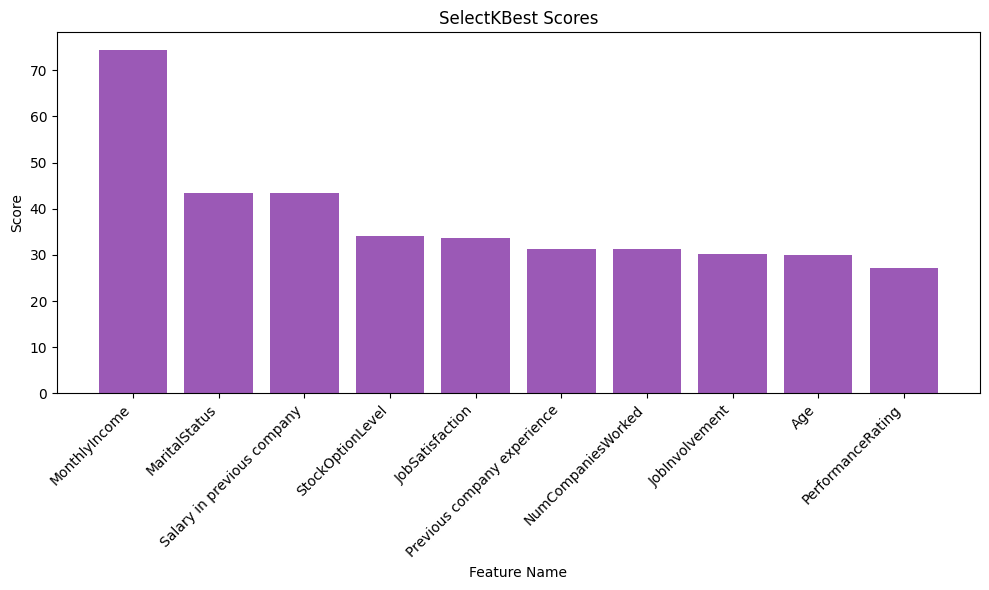

In [48]:

# Plot the scores
plt.figure(figsize=(10, 6))
plt.bar(range(k), sorted_scores[:k])
plt.xticks(range(k), top_feature_names, rotation=45, ha='right')
plt.xlabel('Feature Name')
plt.ylabel('Score')
plt.title('SelectKBest Scores')
plt.tight_layout()
plt.show()








## Preparation of test data

In [49]:
#reading the test data
test_data = pd.read_csv('/content/drive/MyDrive/Emp_attrition_Test.csv')


In [50]:
#categorical encoding
test_data = test_data.apply(LabelEncoder().fit_transform)

In [51]:
#seperating the features and labels
X_test = test_data.drop(['Attrition'],axis=1)
y_test = test_data['Attrition']

In [52]:
X_test =X_test[top_feature_names]

In [53]:
X_test.head()

,MonthlyIncome,MaritalStatus,Salary in previous company,StockOptionLevel,JobSatisfaction,Previous company experience,NumCompaniesWorked,JobInvolvement,Age,PerformanceRating
0,24,1,24,0,2,1,1,3,22,0
1,152,0,152,2,2,1,2,2,21,0
2,379,0,379,1,3,1,3,2,12,0
3,366,0,366,1,3,1,4,2,27,0
4,138,2,138,0,0,1,2,1,20,1


## Machine learning models

In [54]:
features_df_new.columns

Index(['MonthlyIncome', 'MaritalStatus', 'Salary in previous company',
       'StockOptionLevel', 'JobSatisfaction', 'Previous company experience',
       'NumCompaniesWorked', 'JobInvolvement', 'Age', 'PerformanceRating'],
      dtype='object')

In [55]:
k = 5

# Create a logistic regression model (replace with your desired model)

estimator = RandomForestClassifier()
# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(estimator, X_train, y_train, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
print('Accuracy scores for each fold:', scores)

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(scores)
print('Average accuracy:', average_accuracy)

Accuracy scores for each fold: [0.87378641 0.83495146 0.82038835 0.82439024 0.85853659]
Average accuracy: 0.8424106085721051


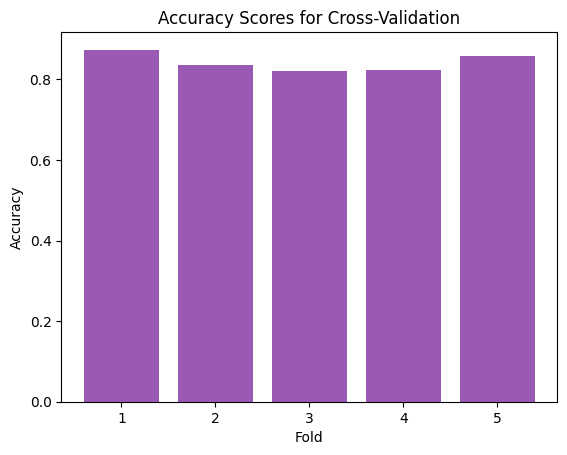

In [56]:
folds = list(range(1, len(scores) + 1))

# Plot the accuracy scores
plt.bar(folds, scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Cross-Validation')
plt.show()

## Machine learning models

Gradient Boosting

In [57]:
#Gradient boosting classifier
gb = GradientBoostingClassifier()
#fitting the model
gb.fit(features_df_new,y_train)

GradientBoostingClassifier()

In [58]:
#model testing
gb_preds = gb.predict(X_test)
gb.score(X_test,y_test)

0.8235294117647058

Classification report

In [59]:
print(classification_report(y_test,gb_preds,target_names=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.87      0.93      0.90       377
          No       0.35      0.23      0.28        65

    accuracy                           0.82       442
   macro avg       0.61      0.58      0.59       442
weighted avg       0.80      0.82      0.81       442



Confusion matrix

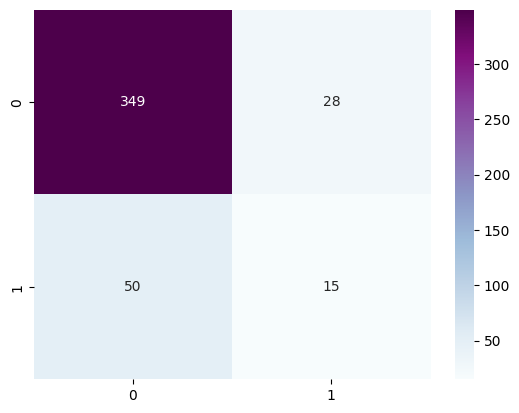

In [60]:
cm = confusion_matrix(y_test,gb_preds)
sns.heatmap(cm,annot=True,fmt='g',cmap="BuPu")
plt.show()

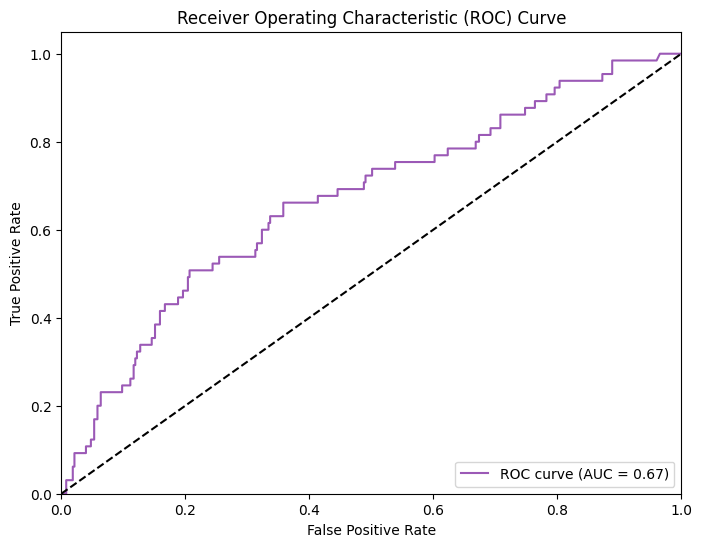

In [61]:
y_pred_proba = gb.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Ada Boosting

In [62]:
ada = AdaBoostClassifier()
#fitting the model
ada.fit(features_df_new,y_train)

AdaBoostClassifier()

In [63]:
#model testing
ada_preds = ada.predict(X_test)
ada.score(X_test,y_test)

0.8257918552036199

Classification report

In [64]:
print(classification_report(y_test,ada_preds,target_names=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.87      0.94      0.90       377
          No       0.32      0.17      0.22        65

    accuracy                           0.83       442
   macro avg       0.60      0.55      0.56       442
weighted avg       0.79      0.83      0.80       442



Confusion matrix

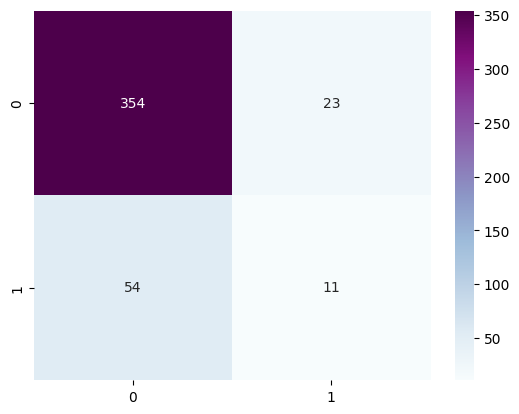

In [65]:
cm = confusion_matrix(y_test,ada_preds)
sns.heatmap(cm,annot=True,fmt='g',cmap="BuPu")
plt.show()

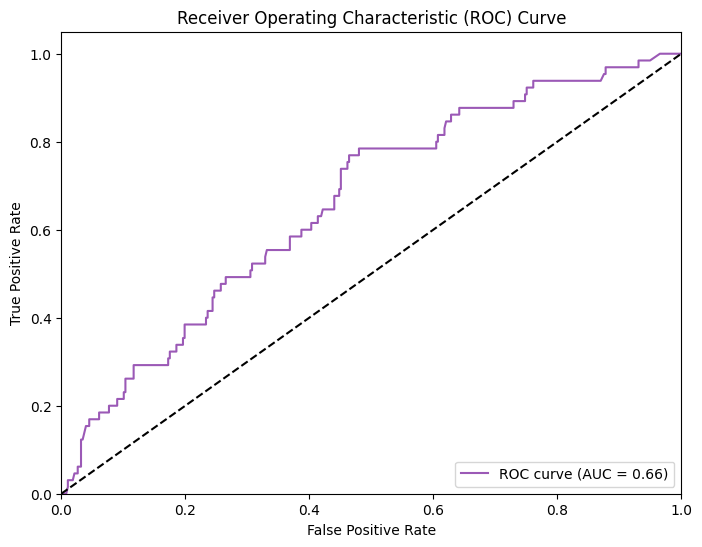

In [66]:
y_pred_proba = ada.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()